# Demo - Support Vector Machine

# Problem Statement

## Given Details Of Loan Application Predict The Loan Will Be Granted Or Not.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.metrics import accuracy_score
# from io import StringIO
# from matplotlib.colors import ListedColormap
%matplotlib inline

# Dataset

## Dataset includes detalls of different loan applications along with the application status:

Loan ID: LP001002(Application ID)

• Gender: Male/Female

• Applicantincome: Monthly income of the applicant

LoanAmount: Amount to be loaned

Loan Status: Either the application has been accepted or not(Y/N)

In [3]:
Loan_Data = pd.read_csv("loan_grant.csv")

In [4]:
Loan_Data.head()

,Loan_ID,Gender,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,5849,NaN,Y
1,LP001003,Male,4583,128.0,N
2,LP001005,Male,3000,66.0,Y
3,LP001006,Male,2583,120.0,Y
4,LP001008,Male,6000,141.0,Y


In [5]:
Loan_Data.shape


(614, 5)

In [6]:
Loan_Data.describe()

,ApplicantIncome,LoanAmount
count,614.000000,592.000000
mean,5403.459283,146.412162
std,6109.041673,85.587325
min,150.000000,9.000000
25%,2877.500000,100.000000
50%,3812.500000,128.000000
75%,5795.000000,168.000000
max,81000.000000,700.000000


In [21]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          614 non-null    object 
 1   Gender           614 non-null    object 
 2   ApplicantIncome  614 non-null    int64  
 3   LoanAmount       614 non-null    float64
 4   Loan_Status      614 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 24.1+ KB


In [14]:
# Checking Null Values
Loan_Data.isnull().sum()

Loan_ID             0
Gender             13
ApplicantIncome     0
LoanAmount         22
Loan_Status         0
dtype: int64

# Treating Null Values

In [17]:
Loan_Data["Gender"]=  Loan_Data["Gender"].fillna(Loan_Data["Gender"].mode()[0])
Loan_Data["LoanAmount"] = Loan_Data["LoanAmount"].fillna(Loan_Data["LoanAmount"].mean())

In [19]:
# Checking Null Values
Loan_Data.isnull().sum()

Loan_ID            0
Gender             0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64

In [106]:
# target_ratio= Loan_Data.Loan_Status.value_counts()/len(Loan_Data)
# print(target_ratio)

# plt.figure(figsize=(12,4))
# plt.bar(target_ratio.index,target_ratio)
# plt.ylabel("percentage")


# Check Distribution Of Target Variable

In [32]:
Target_Ratio = Loan_Data.Loan_Status.value_counts()

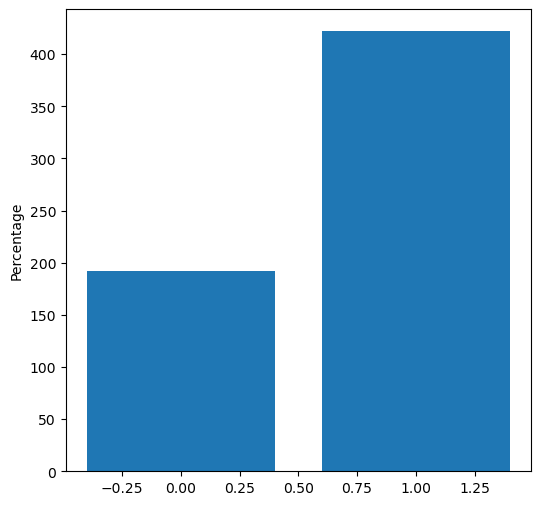

In [34]:
# Checking FOr Data UnBalanced
plt.figure(figsize=(6,6))
plt.bar(Target_Ratio.index,Target_Ratio)
plt.ylabel("Percentage")
plt.show()

# Enocde Target Variable

In [37]:
#Using LabelEncoder To Encode The Target variable

lb=LabelEncoder()
lb.fit(Loan_Data["Loan_Status"])
Loan_Data.Loan_Status = lb.transform(Loan_Data.Loan_Status)
Loan_Data.Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

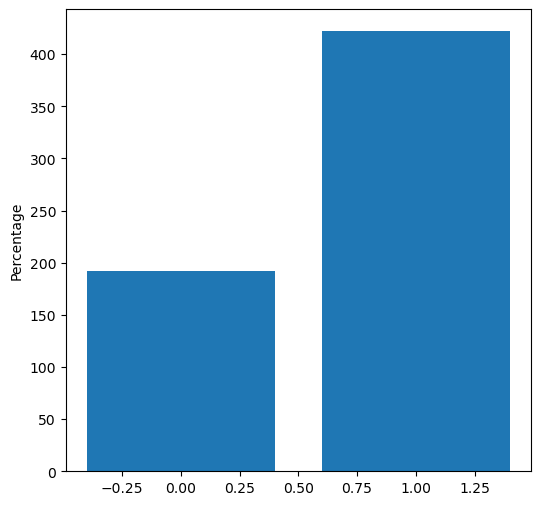

In [39]:
plt.figure(figsize=(6,6))
plt.bar(Target_Ratio.index,Target_Ratio)
plt.ylabel("Percentage")
plt.show()

In [41]:
# Training And Testing Data
X=Loan_Data[["ApplicantIncome","LoanAmount"]]
y=Loan_Data.Loan_Status

In [43]:
rc=RobustScaler()
X=rc.fit_transform(X)

In [45]:
Loan_Data.Loan_Status
X

array([[ 0.69802913,         nan],
       [ 0.26409597,  0.        ],
       [-0.27849186, -0.91176471],
       ...,
       [ 1.45998286,  1.83823529],
       [ 1.29237361,  0.86764706],
       [ 0.26409597,  0.07352941]])

In [47]:
#Split The Data Into Training And Testing Data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.4)

# Support Vector Machine
#### Some important hyperparameters that should be considered before training the model:

•C: Regularization parameter which a float value and is 1.0 by default. Must be strictly positive. kernel: Specifies the kernel type to be used in the algorithm. 'linear', 'poly', 'rbf'

⚫ degree: An optional integer value to specify the degree of polynomial kemel fucntion which is ignored by all other kernels.

• gamma: Kemel coefficient for 'rbf', 'poly'

• coefo: Independent lerm in kemel function which is significant in 'poly".

# Linear SVM

In [51]:
svc_loan = SVC()

In [128]:
svc_loan.fit(X_train,y_train)

SVC()

# Accuracy Score

In [131]:
pred=svc_loan.predict(X_test)
acc_svc_loan = accuracy_score(y_test,pred)
print("Accuracy Score :",acc_svc_loan)

Accuracy Score : 0.6951219512195121
